# Time Series with Facebook Prophet

In [9]:
import pandas as pd
import numpy as np
import datetime

from pathlib import Path

import matplotlib.pyplot as plt

import os, sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from fbp import ProphetModel

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

## Provincial

### New cases

In [5]:
province = "Firenze"
compart = "New_cases"
date = 'Date'
group_column = 'Province'

In [6]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

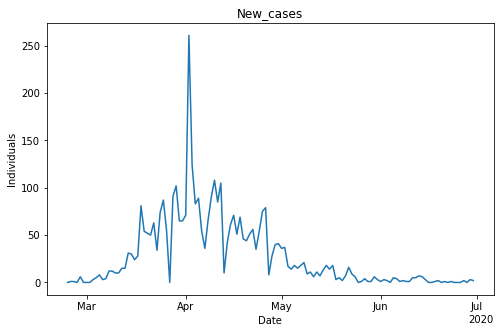

In [7]:
pm.plot_data()

In [8]:
pm.fit()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


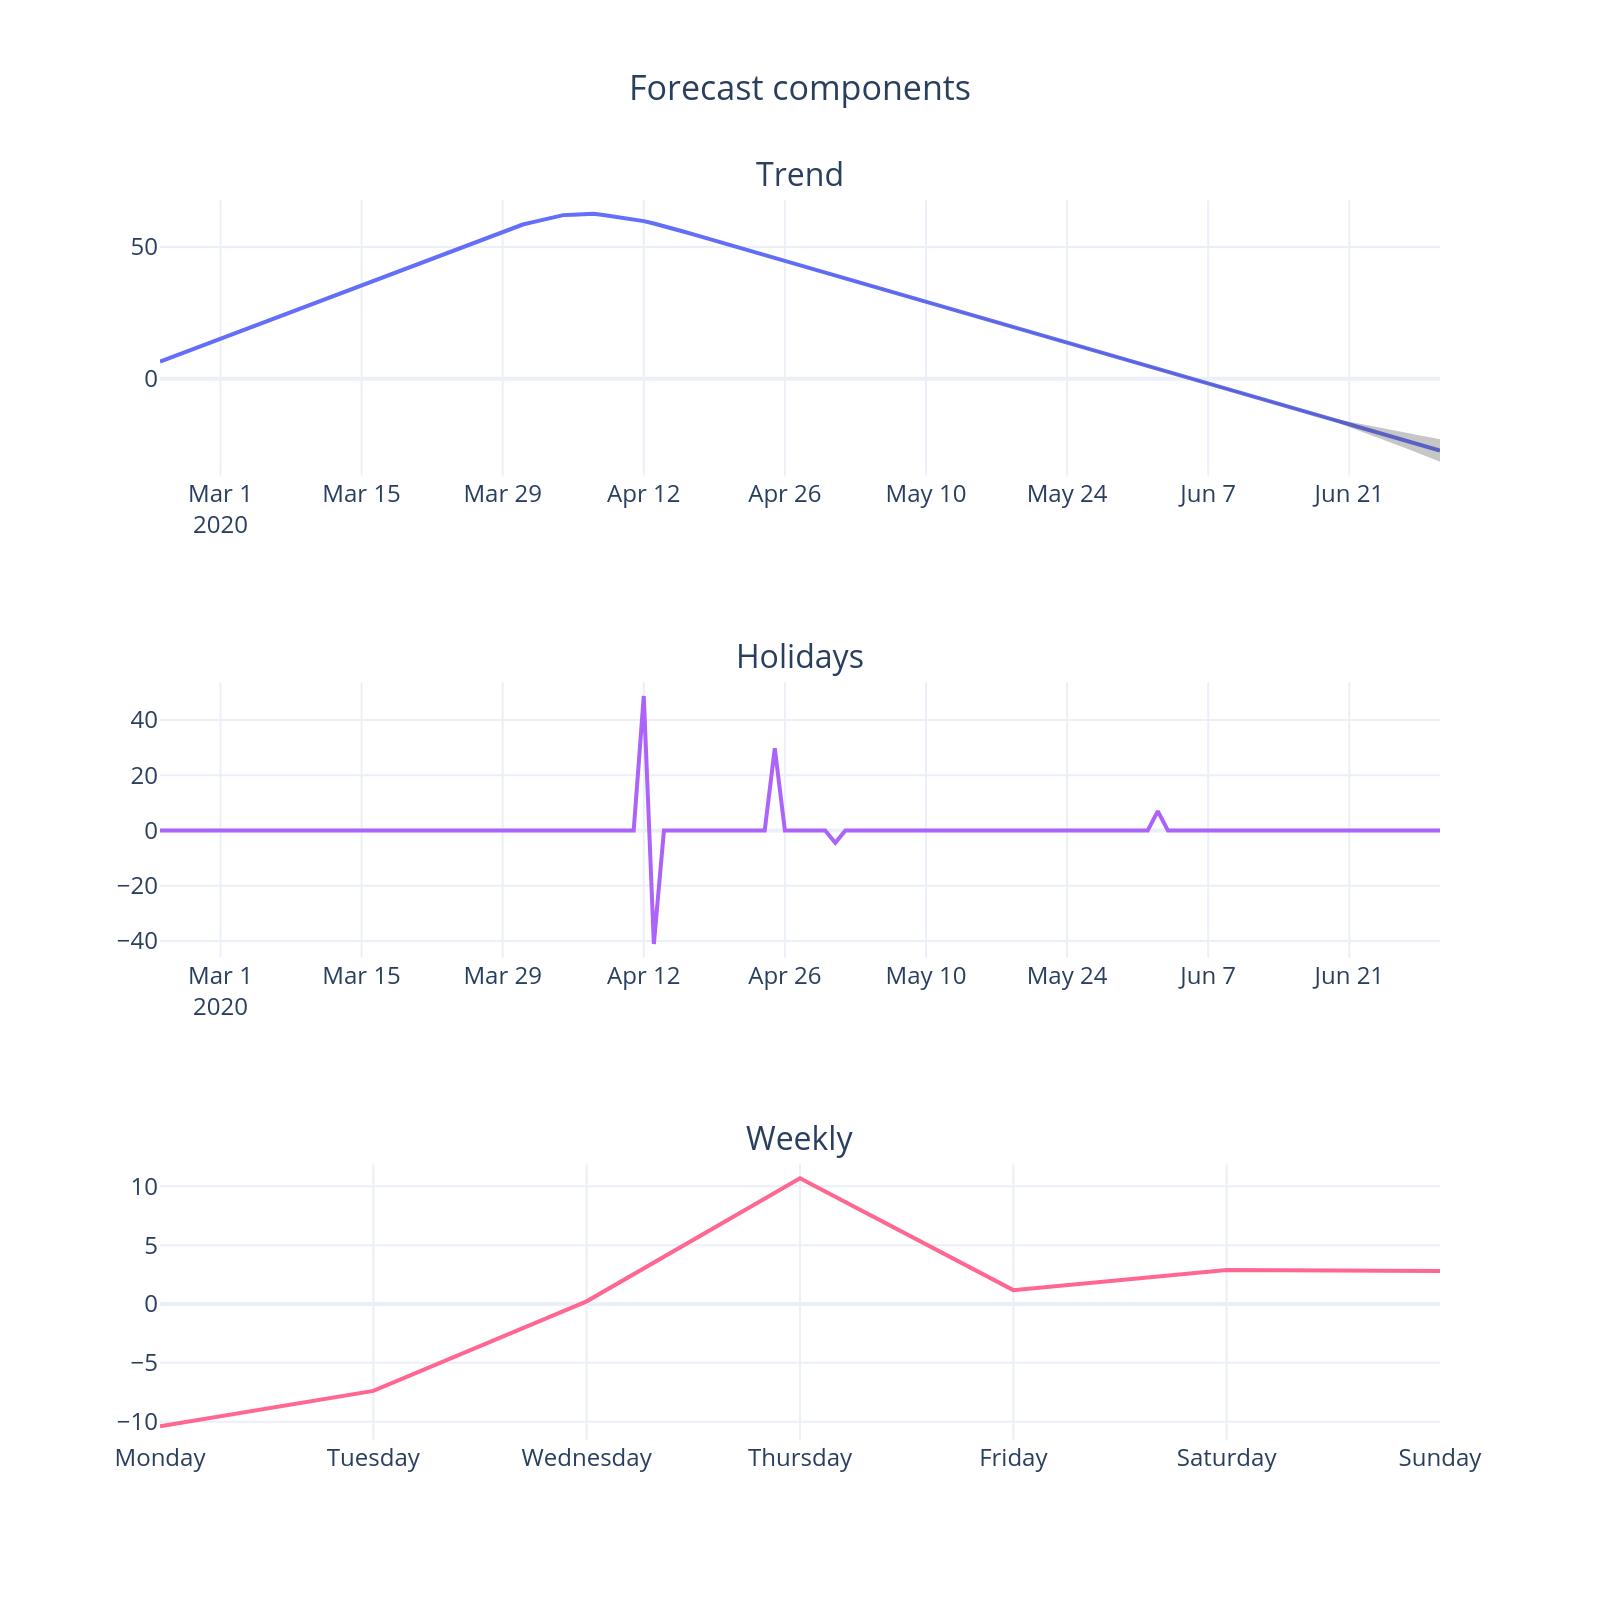

In [9]:
pm.plot_comp_plotly(output_image=True)

In [10]:
pm.print_metrics()

MAE: 15.474
MSE: 610.937
RMSE: 24.717


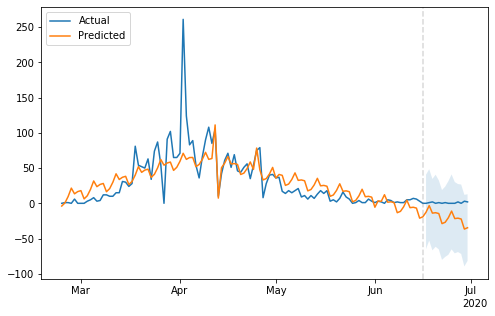

In [11]:
pm.plot()

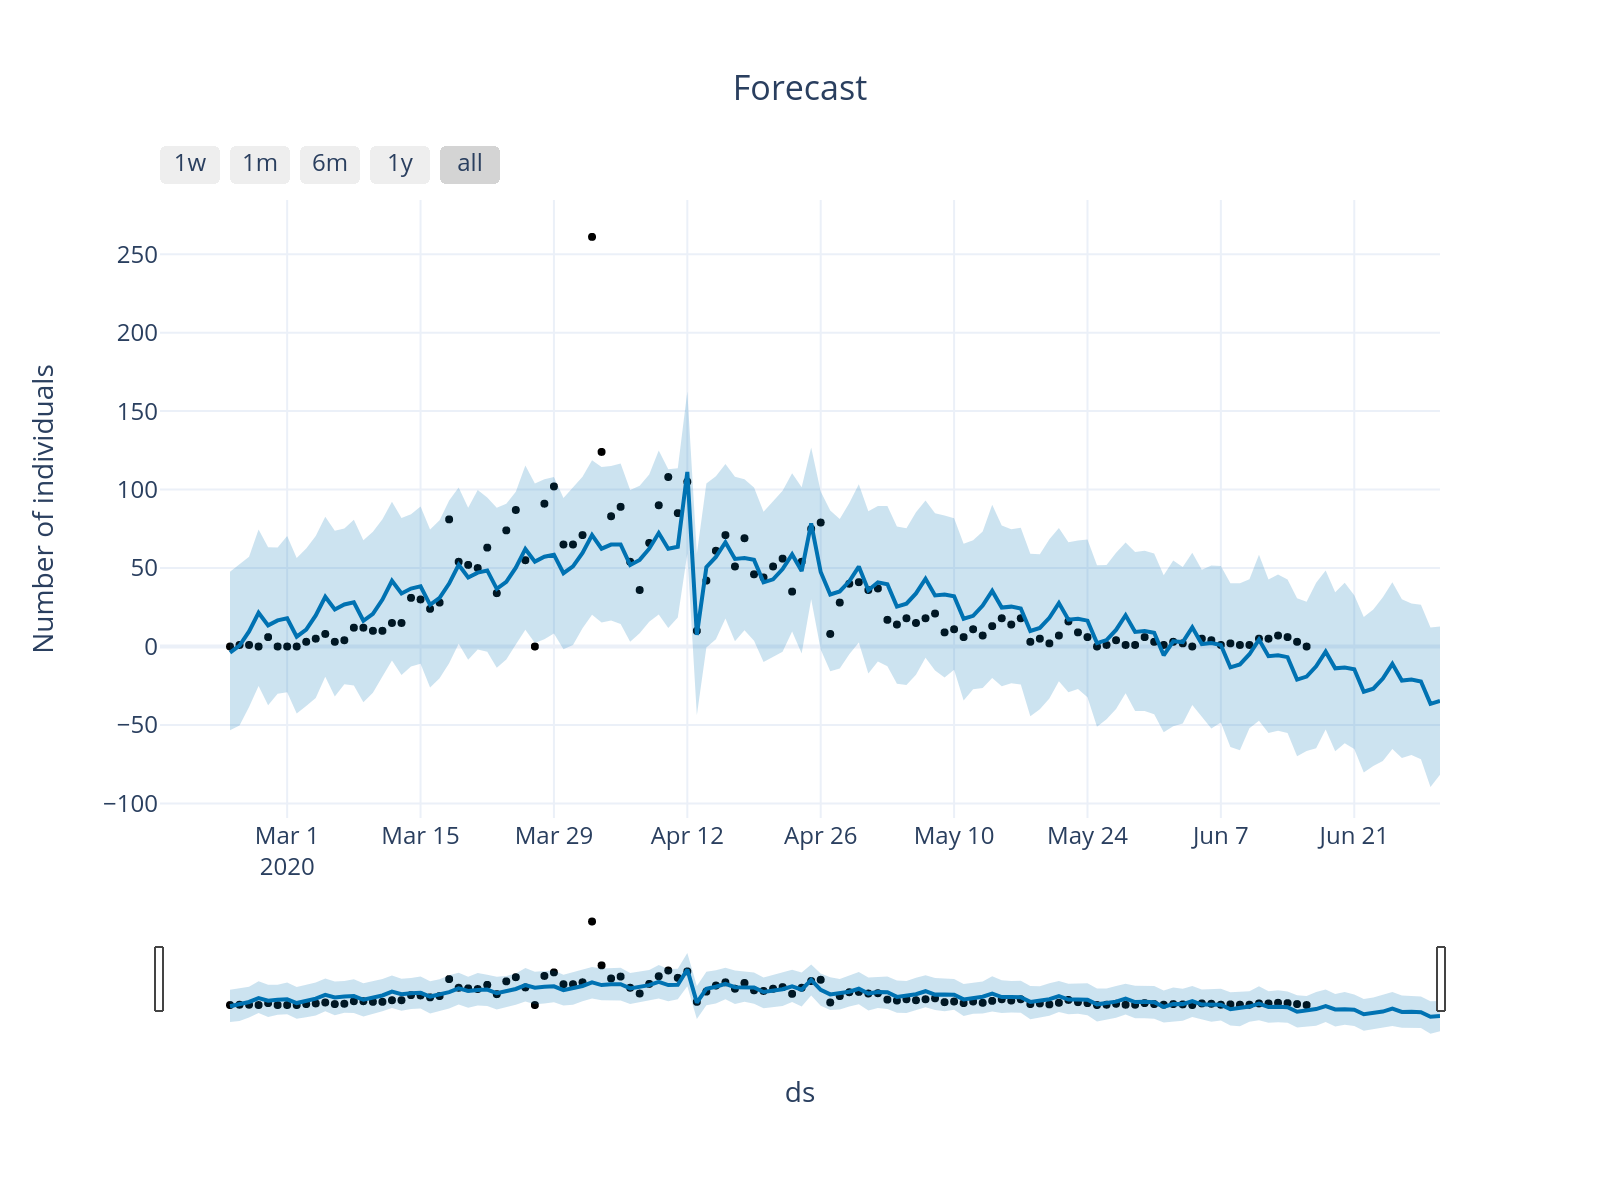

In [12]:
pm.plot_forecast(output_image=True)

In [13]:
# Tune the hyperparameters and fit
pm.fit_cv()

a0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1fed37cc40>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f20208bf9a0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:f

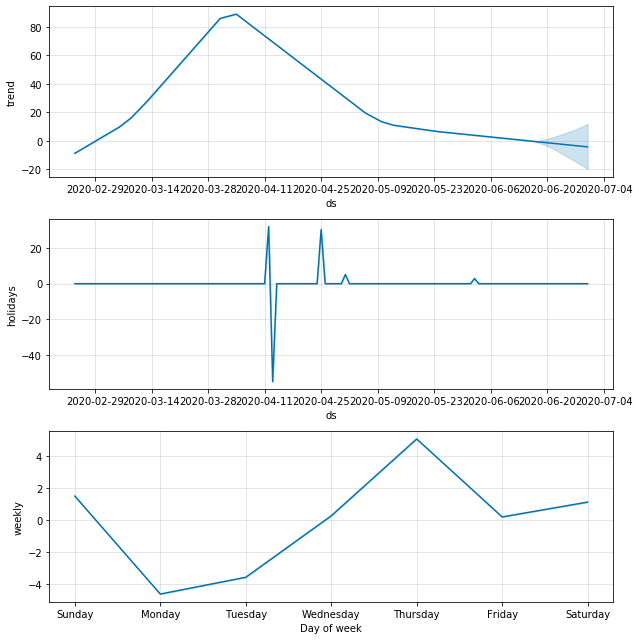

In [14]:
pm.plot_comp()

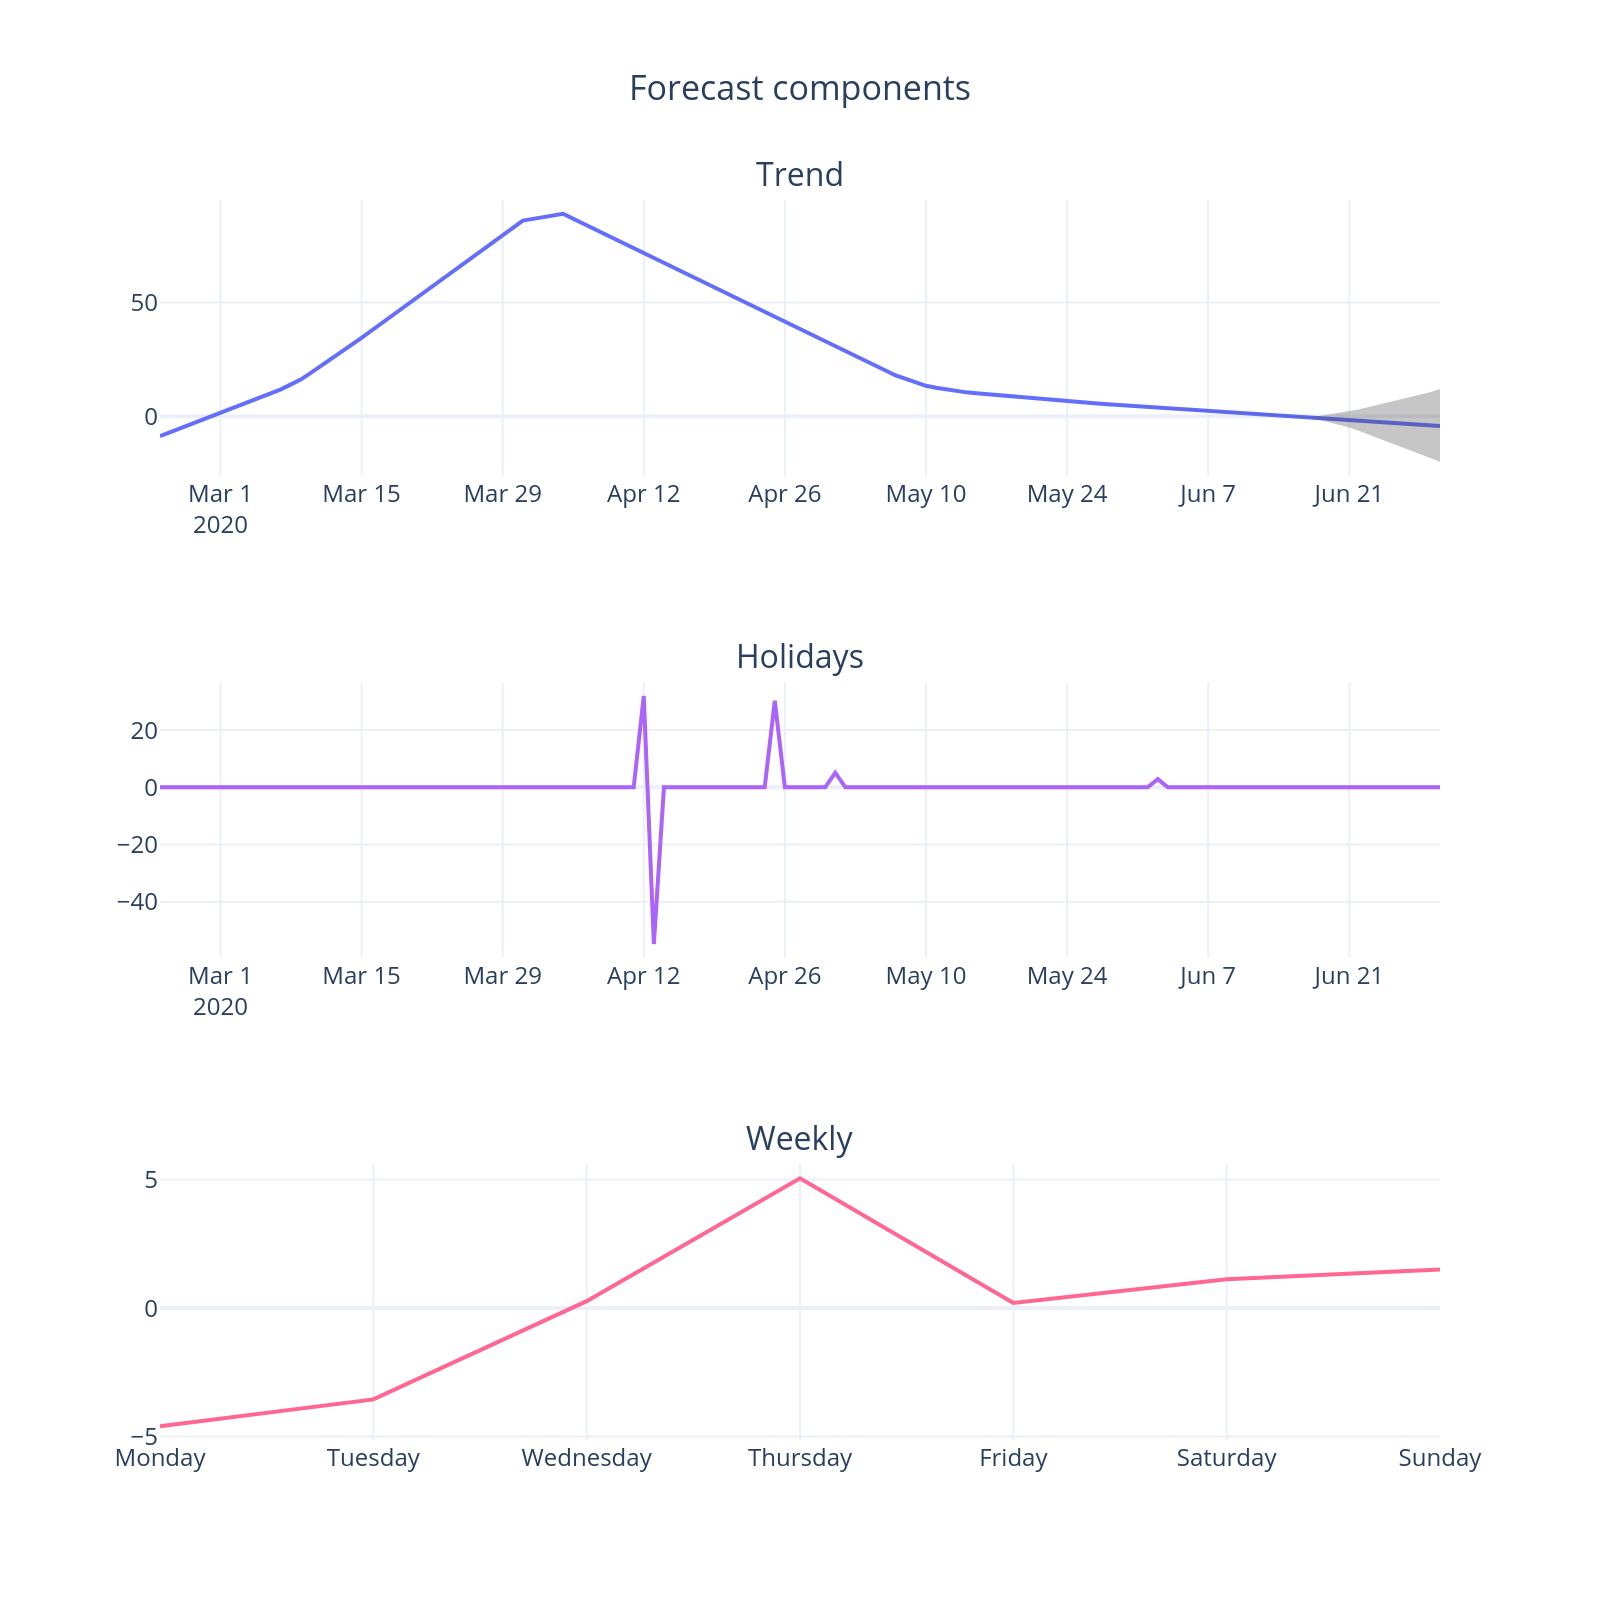

In [15]:
pm.plot_comp_plotly(output_image=True)

In [16]:
pm.print_metrics()

MAE: 9.203
MSE: 385.328
RMSE: 19.630


In [19]:
pm.tuning_results

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.10   
2                     0.001                     0.01                  1.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.10   
62                    0.500                    10.00                  1.00   
63                    0.500                    10.00                 10.00   

         rmse        mae         mse  
0   27.650460  23.548298  764.547926  
1   26.239607  22.230239  688.516967  
2   25.835722  22.695496  667.484534  
3   25.460709  22.206623  648.247706  
4   28.154695  24.091847  792.686833  
..        ...        ...         ...  
59  14.937399  11.747133  223.125875  
60  14.486510  11.023279  209.858964  
61  13.530629  10.472022  183.077933  
62  13.966635  10.966807  195.066893  
63  14.765284  11.652110  218.013605  

[64 rows x 6 columns]

In [23]:
pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
51                      0.5                     0.01                  10.0   

         rmse        mae         mse  
51  12.721718  10.376425  161.842108

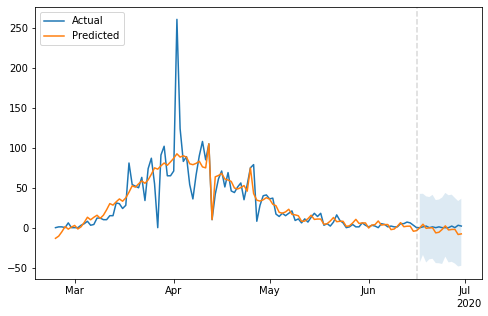

In [17]:
pm.plot()

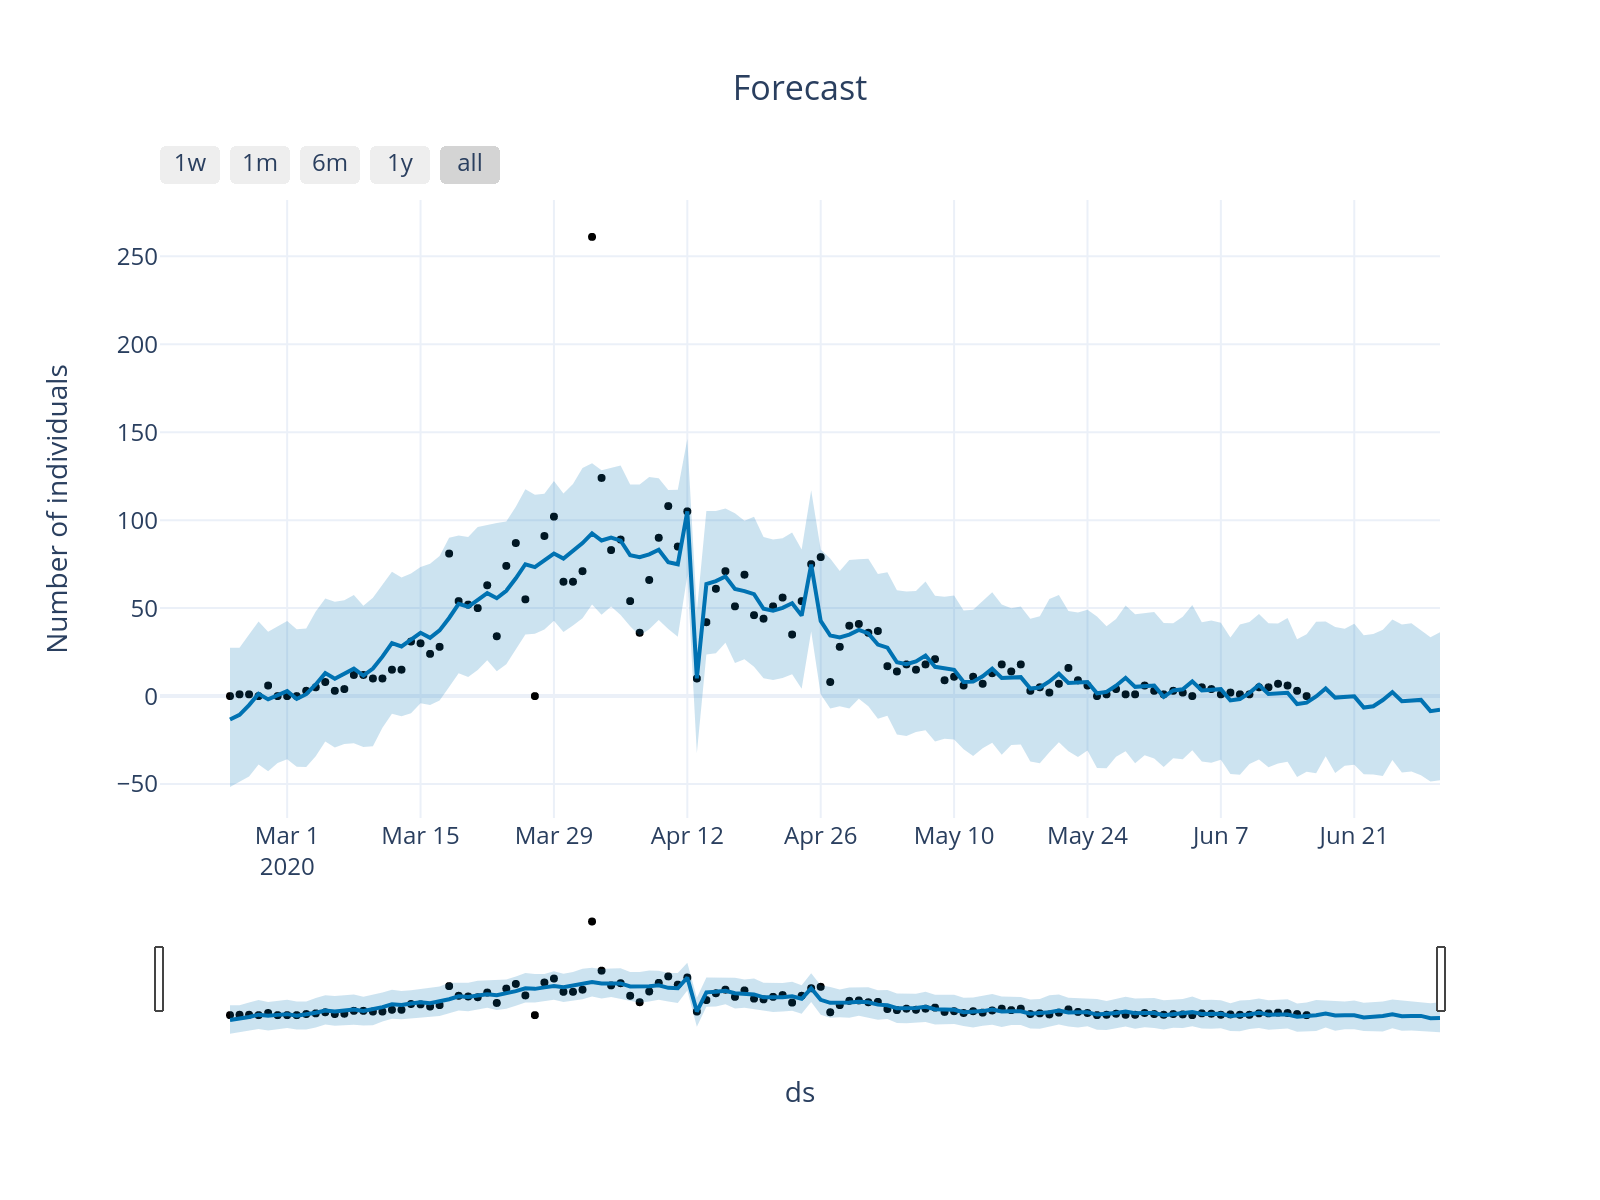

In [18]:
pm.plot_forecast(output_image=True)

### Deaths

In [5]:
province = "Firenze"
compart = "Deaths"
date = 'Date'
group_column = 'Province'

In [6]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

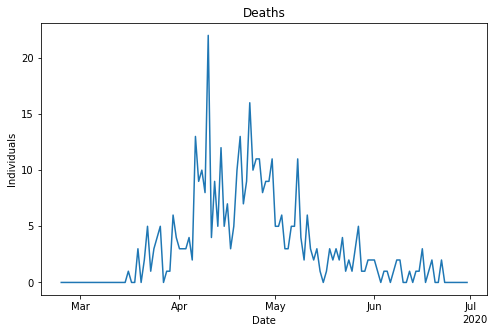

In [7]:
pm.plot_data()

In [8]:
pm.fit_cv()

e0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5c3ff10700>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5c3fff4be0>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:f

In [9]:
pm.tuning_results

pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
33                      0.1                     0.01                   0.1   

        rmse       mae       mse  
33  1.594425  1.318595  2.542191

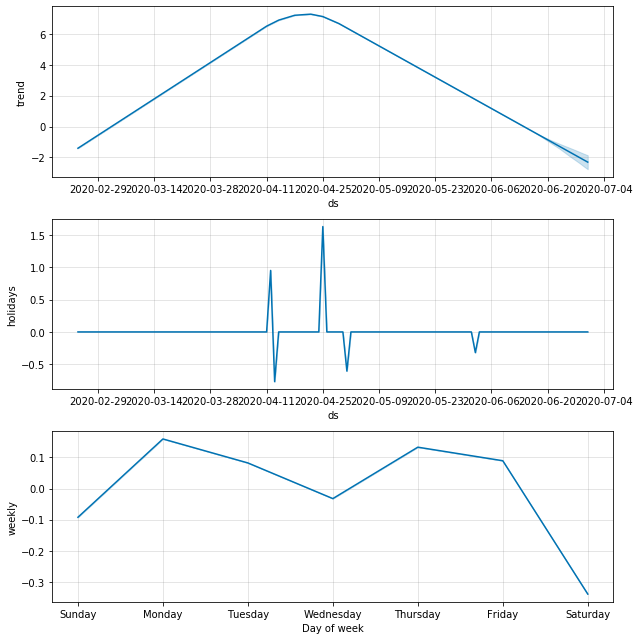

In [10]:
pm.plot_comp()

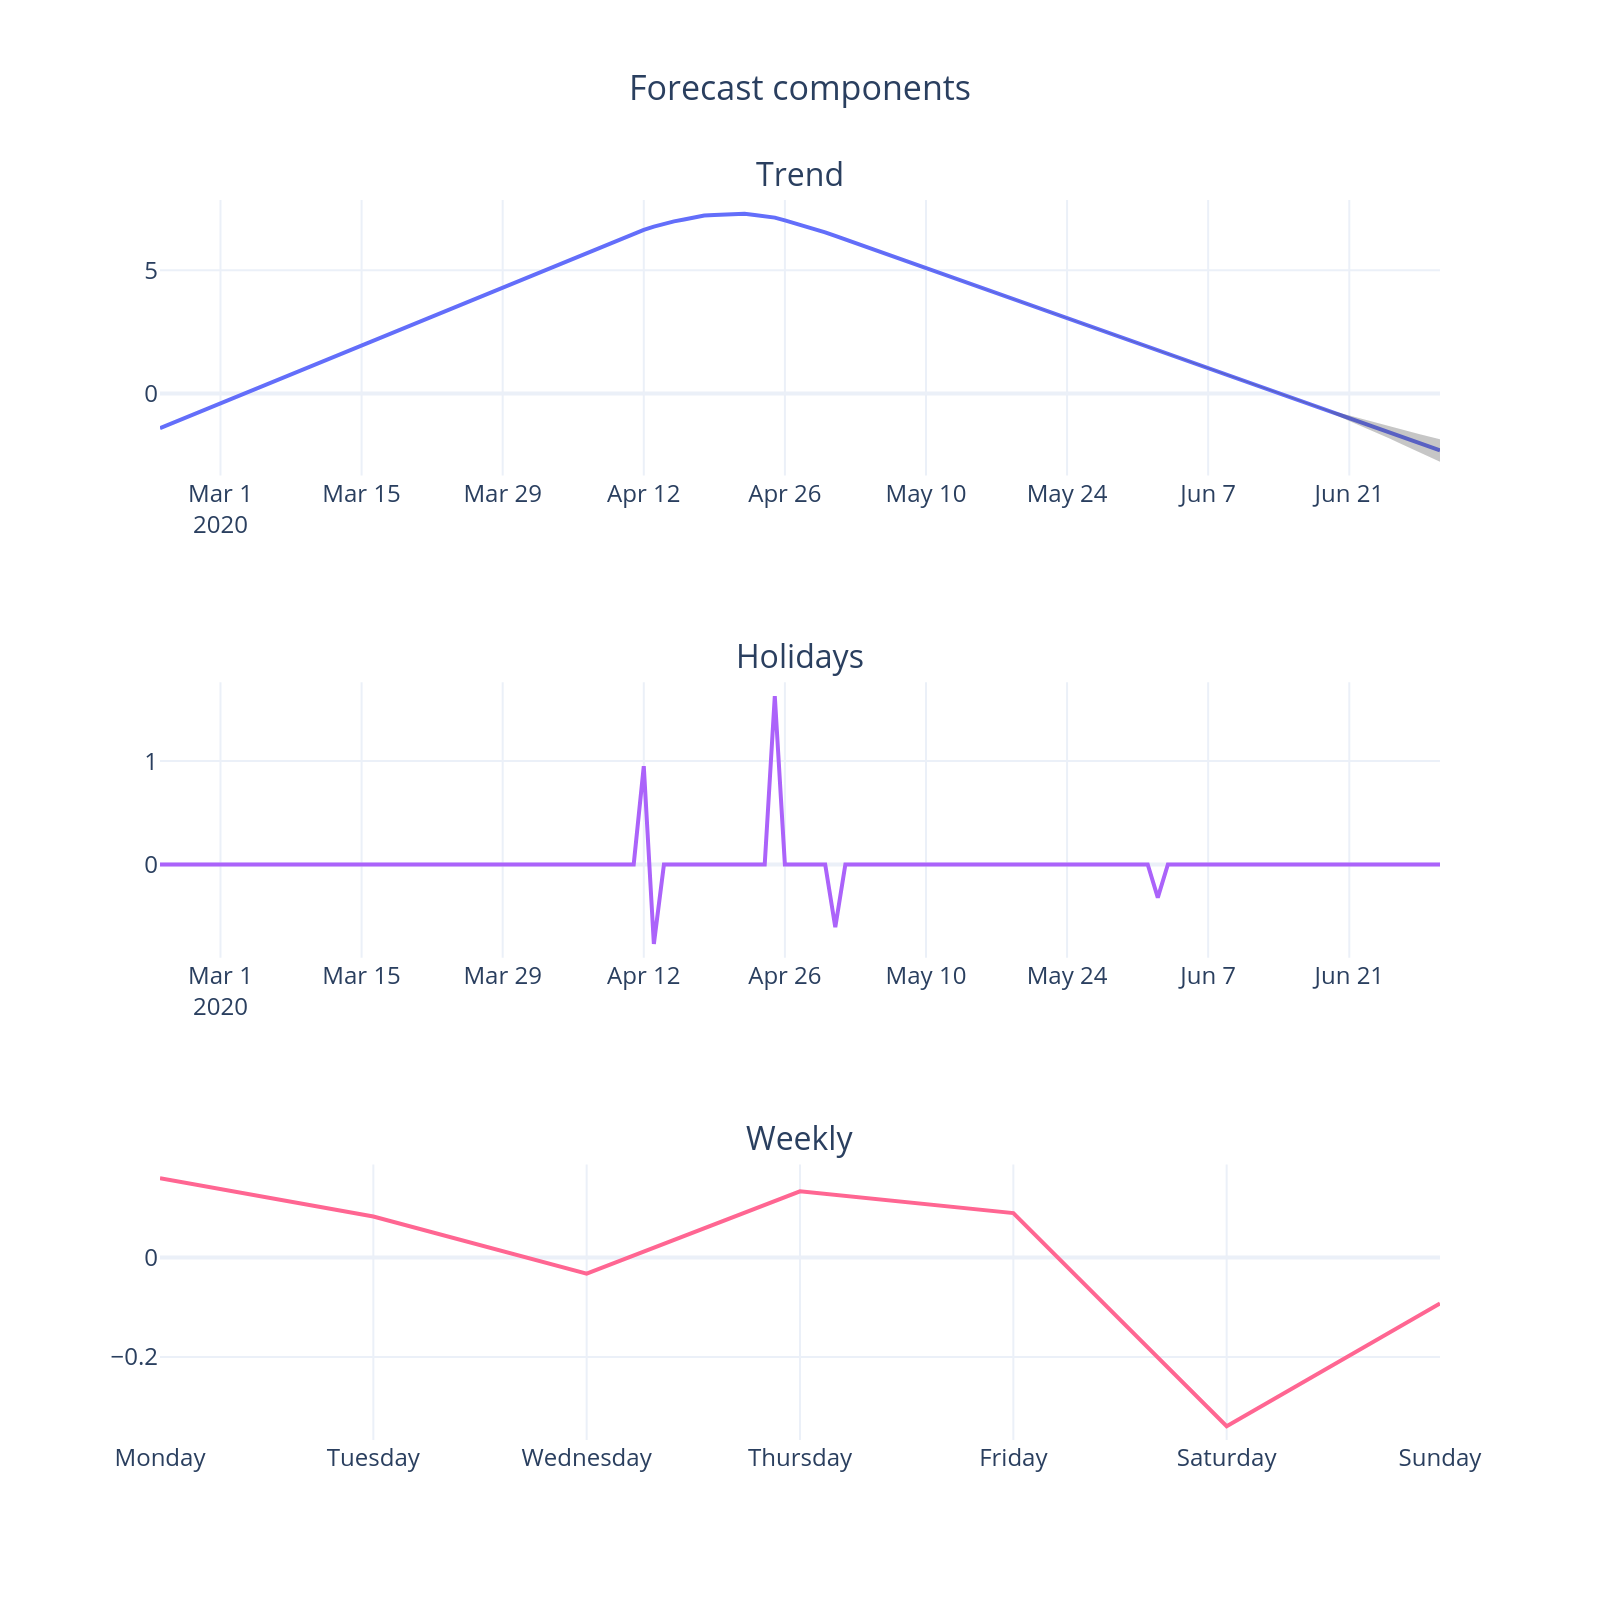

In [11]:
pm.plot_comp_plotly(output_image=True)

In [12]:
pm.print_metrics()

MAE: 1.838
MSE: 6.892
RMSE: 2.625


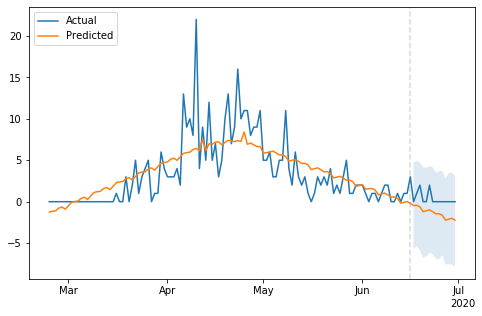

In [13]:
pm.plot()

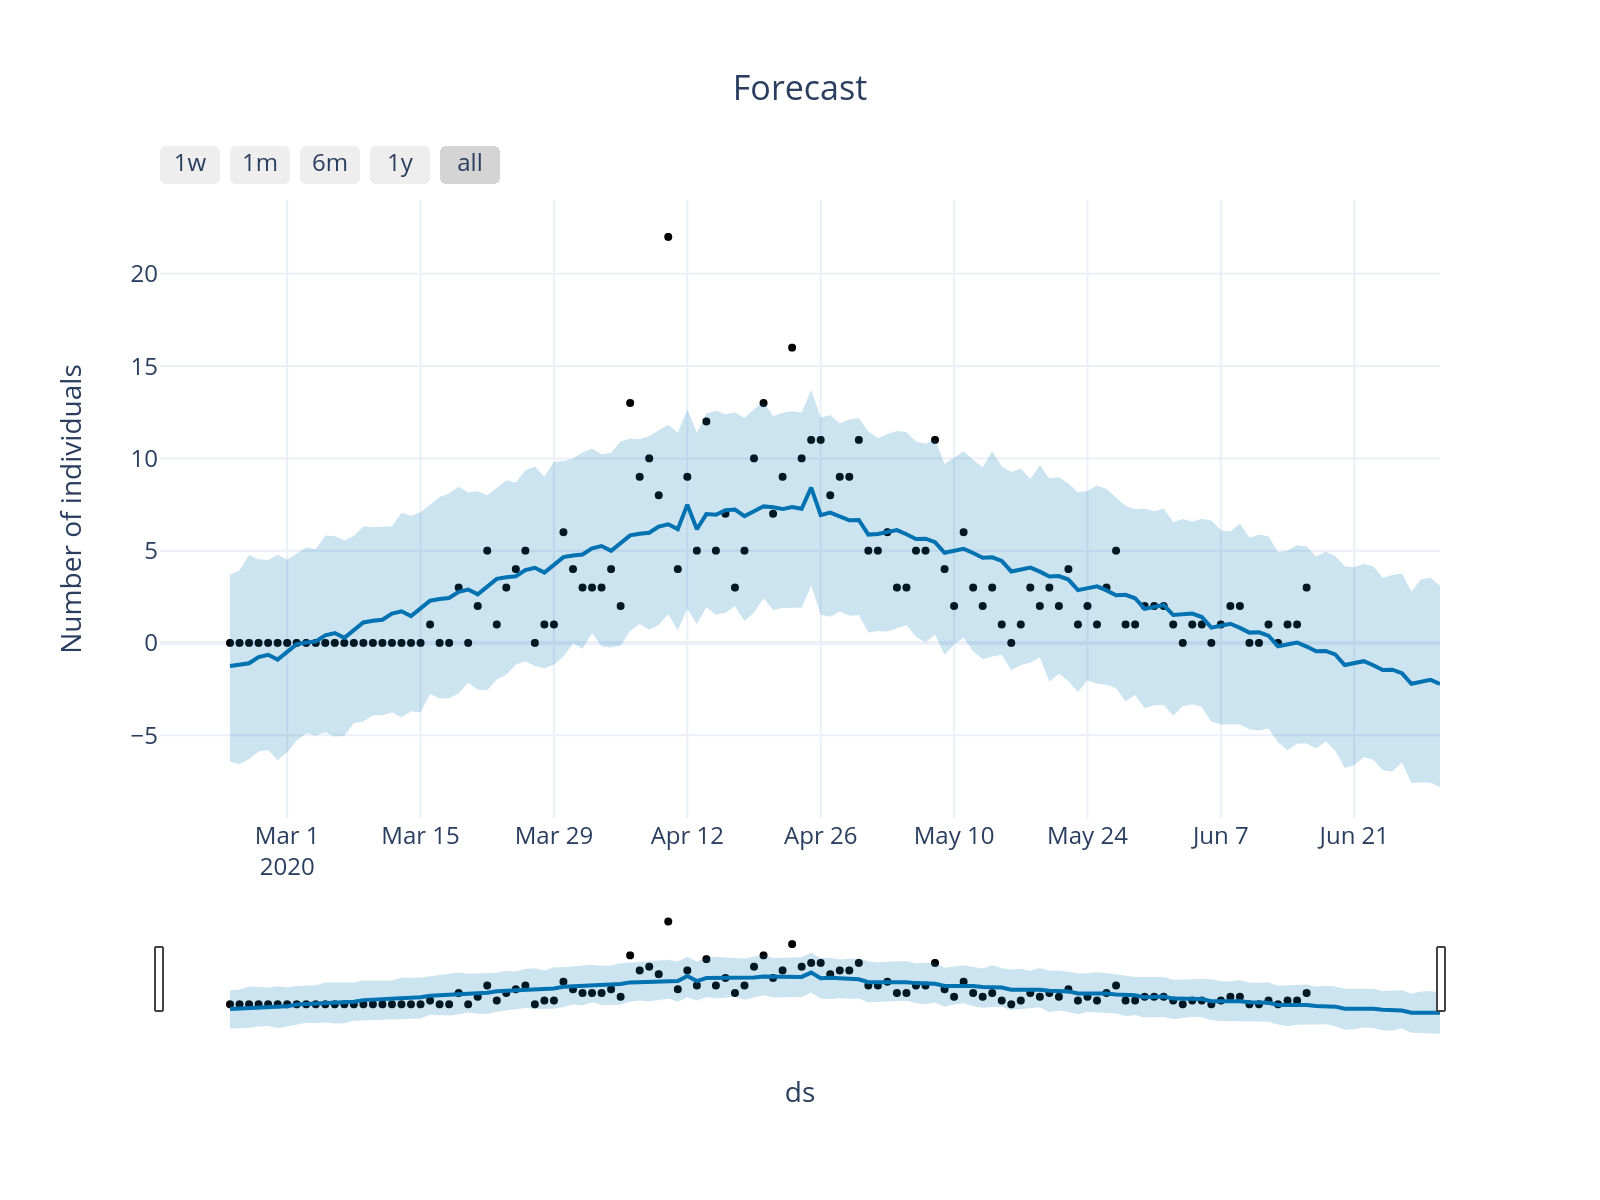

In [14]:
pm.plot_forecast(output_image=True)

### All provinces
New cases

In [8]:
import logging
from tqdm import tqdm

In [9]:
logging.basicConfig()
handler = logging.StreamHandler()
logger = logging.getLogger('fbprophet')
logger.addHandler(handler)
logger.setLevel(logging.CRITICAL)

In [7]:
compart = "New_cases"
date = 'Date'
group_column = 'Province'

In [8]:
results = []

In [ ]:
for province in tqdm(covidpro_df.Province.unique()):
    pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

    pm.fit_cv(initial=None, period=None)

    results.append([province, np.round(pm.mae(), 2), np.round(pm.mse(), 2), np.round(pm.rmse(), 2)])

In [ ]:
prov_res = pd.DataFrame(results, columns=['province', 'mae', 'mse', 'rmse'])
prov_res

In [5]:
prov_res = pd.read_csv("../results/fbp_province.csv")

In [6]:
prov_res

province    mae     mse   rmse
0       Agrigento   0.88    3.73   1.93
1     Alessandria  17.39  797.02  28.23
2          Ancona   4.97   71.94   8.48
3           Aosta   7.01  118.77  10.90
4          Arezzo   3.83   58.21   7.63
..            ...    ...     ...    ...
86       Vercelli   6.43  116.11  10.78
87         Verona  16.96  632.48  25.15
88  Vibo Valentia   0.85    2.36   1.54
89        Vicenza   7.48  135.94  11.66
90        Viterbo   3.06   28.97   5.38

[91 rows x 4 columns]

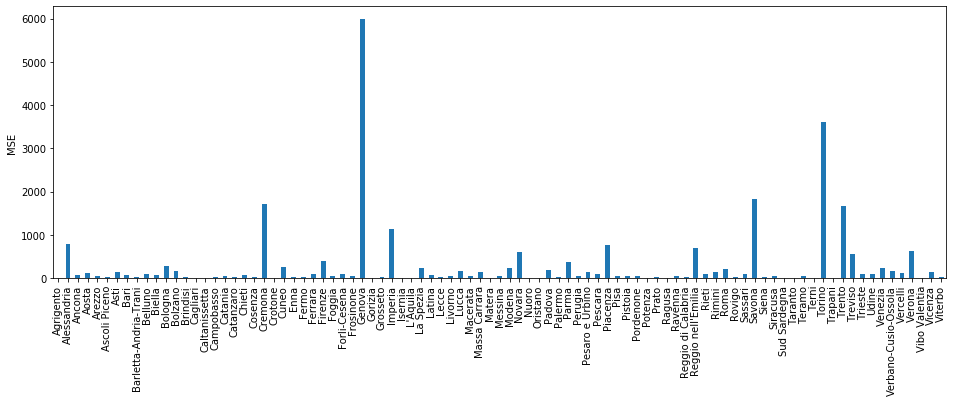

In [12]:
prov_res.plot(x="province", y="mse", xlabel="", ylabel="MSE", legend=False, figsize=(16,5), kind="bar")
plt.show()

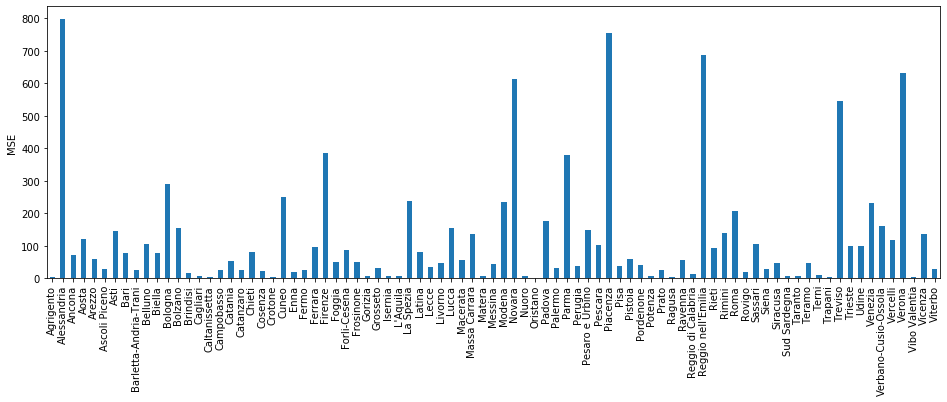

In [15]:
prov_res.loc[(prov_res.mse < 1000)].plot(x="province", y="mse", xlabel="", ylabel="MSE", legend=False, figsize=(16,5), kind="bar")
plt.show()

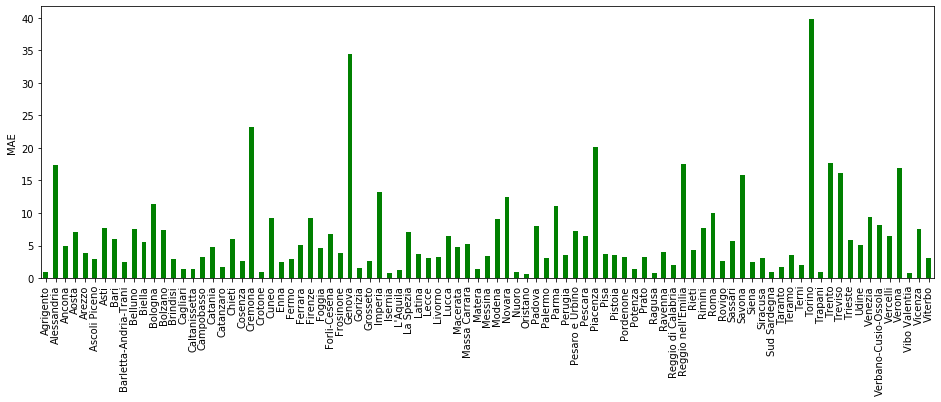

In [13]:
prov_res.plot(x="province", y="mae", xlabel="", ylabel="MAE", legend=False, figsize=(16,5), color="g", kind="bar")
plt.show()

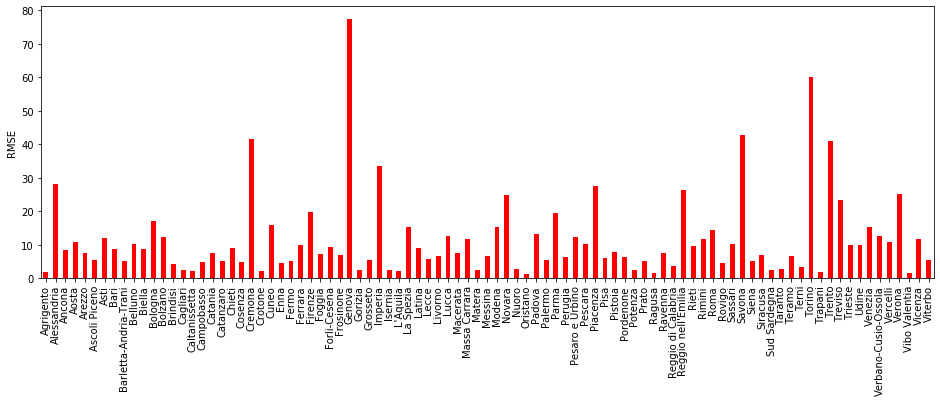

In [14]:
prov_res.plot(x="province", y="rmse", xlabel="", ylabel="RMSE", legend=False, figsize=(16,5), color="r", kind="bar")
plt.show()

In [ ]:
prov_res.to_csv("../results/fbp_province.csv", index=False)

In [ ]:
print(prov_res.to_latex(index=False))

### Regional
Total positives

In [10]:
compart = "totale_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [11]:
results_reg = []

In [12]:
for reg in tqdm(dpc_regioni_df.denominazione_regione.unique()):
    pm = ProphetModel(
        data=dpc_regioni_df, 
        area=reg, 
        compart=compart, 
        group_column=group_column,
        date_column=date,
        query='20200701 > data')

    pm.fit_cv(initial=None, period=None)

    results_reg.append([reg, np.round(pm.mae(), 2), np.round(pm.mse(), 2), np.round(pm.rmse(), 2)])

100%|██████████| 20/20 [3:55:36<00:00, 706.83s/it]


In [13]:
prov_reg = pd.DataFrame(results_reg, columns=['region', 'mae', 'mse', 'rmse'])
prov_reg

region     mae        mse    rmse
0                 Abruzzo   30.19    2569.91   50.69
1              Basilicata    3.59      25.21    5.02
2                Calabria   19.91    1486.67   38.56
3                Campania   45.27    7481.97   86.50
4          Emilia-Romagna  171.80  123400.66  351.28
5   Friuli Venezia Giulia   44.68    5611.03   74.91
6                   Lazio   89.15   24054.01  155.09
7                 Liguria  159.62  107162.13  327.36
8               Lombardia  428.06  354387.93  595.30
9                  Marche   45.86    4941.81   70.30
10                 Molise    9.53     151.70   12.32
11               Piemonte  254.09  294116.89  542.33
12                 Puglia   69.36   27789.53  166.70
13               Sardegna   20.25    1635.94   40.45
14                Sicilia   62.86   11918.14  109.17
15                Toscana   90.27   31196.84  176.63
16    Trentino Alto Adige   69.93   15466.73  124.37
17                 Umbria    5.88      81.83    9.05
18          Valle d'Aosta    9.86     204.74   14.31
19                 Veneto  142.14   73890.12  271.83

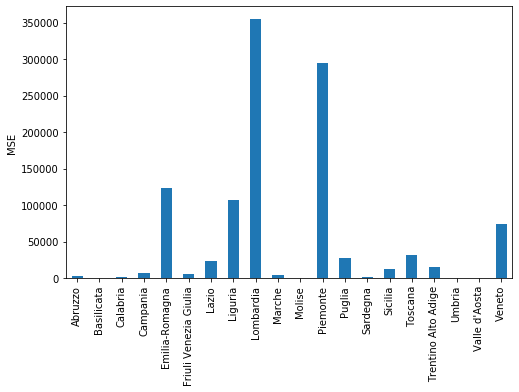

In [20]:
import matplotlib.pyplot as plt

prov_reg.plot(x="region", y="mse", xlabel="", ylabel="MSE", legend=False, figsize=(8,5), kind='bar')
plt.show()

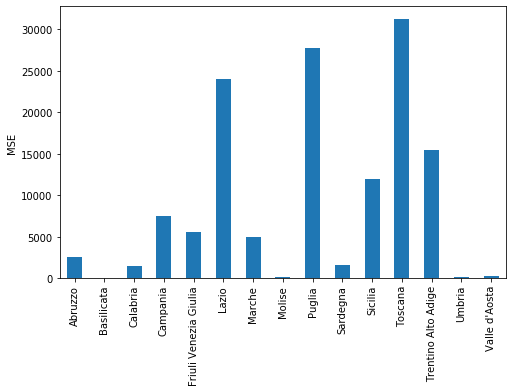

In [23]:
prov_reg.loc[(prov_reg.mse < 50000)].plot(x="region", y="mse", xlabel="", ylabel="MSE", legend=False, figsize=(8,5), kind='bar')
plt.show()

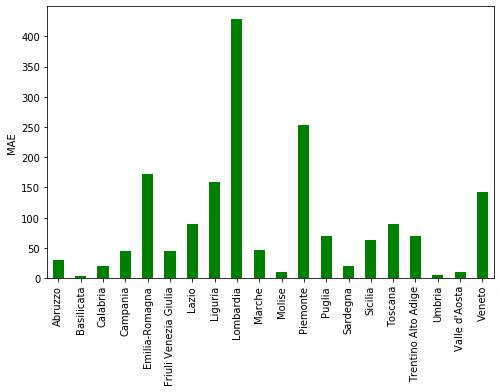

In [21]:
prov_reg.plot(x="region", y="mae", xlabel="", ylabel="MAE", legend=False, figsize=(8,5), color="g", kind='bar')
plt.show()

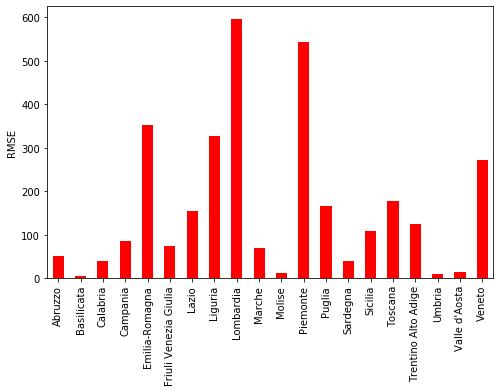

In [22]:
prov_reg.plot(x="region", y="rmse", xlabel="", ylabel="RMSE", legend=False, figsize=(8,5), color="r", kind='bar')
plt.show()

In [14]:
prov_reg.to_csv("../results/fbp_region.csv", index=False)

In [15]:
print(prov_reg.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
                region &     mae &        mse &    rmse \\
\midrule
               Abruzzo &   30.19 &    2569.91 &   50.69 \\
            Basilicata &    3.59 &      25.21 &    5.02 \\
              Calabria &   19.91 &    1486.67 &   38.56 \\
              Campania &   45.27 &    7481.97 &   86.50 \\
        Emilia-Romagna &  171.80 &  123400.66 &  351.28 \\
 Friuli Venezia Giulia &   44.68 &    5611.03 &   74.91 \\
                 Lazio &   89.15 &   24054.01 &  155.09 \\
               Liguria &  159.62 &  107162.13 &  327.36 \\
             Lombardia &  428.06 &  354387.93 &  595.30 \\
                Marche &   45.86 &    4941.81 &   70.30 \\
                Molise &    9.53 &     151.70 &   12.32 \\
              Piemonte &  254.09 &  294116.89 &  542.33 \\
                Puglia &   69.36 &   27789.53 &  166.70 \\
              Sardegna &   20.25 &    1635.94 &   40.45 \\
               Sicilia &   62.86 &   11918.14 &  109.17 \\
               T

In [ ]:
logger.setLevel(logging.INFO)

## Regional

### New cases

In [15]:
province = "Lombardia"
compart = "nuovi_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [16]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data')

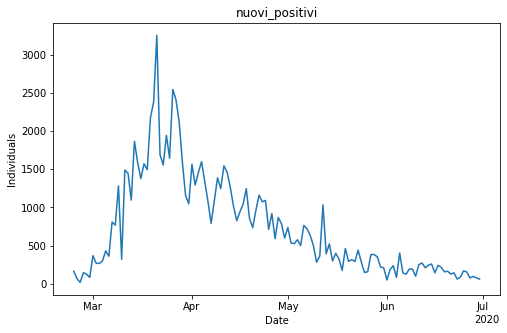

In [17]:
pm.plot_data()

In [18]:
pm.fit_cv()

process.ProcessPoolExecutor object at 0x7f5c3fcab2e0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5c3fc5ef10>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5c4b566730>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
IN

In [24]:
pm.tuning_results

pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
48                      0.5                     0.01                  0.01   

          rmse         mae         mse  
48  161.739217  125.190144  26159.5742

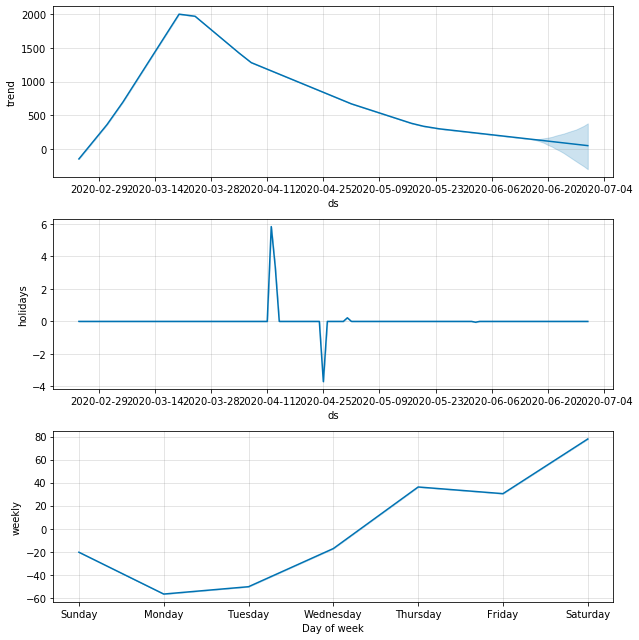

In [19]:
pm.plot_comp()

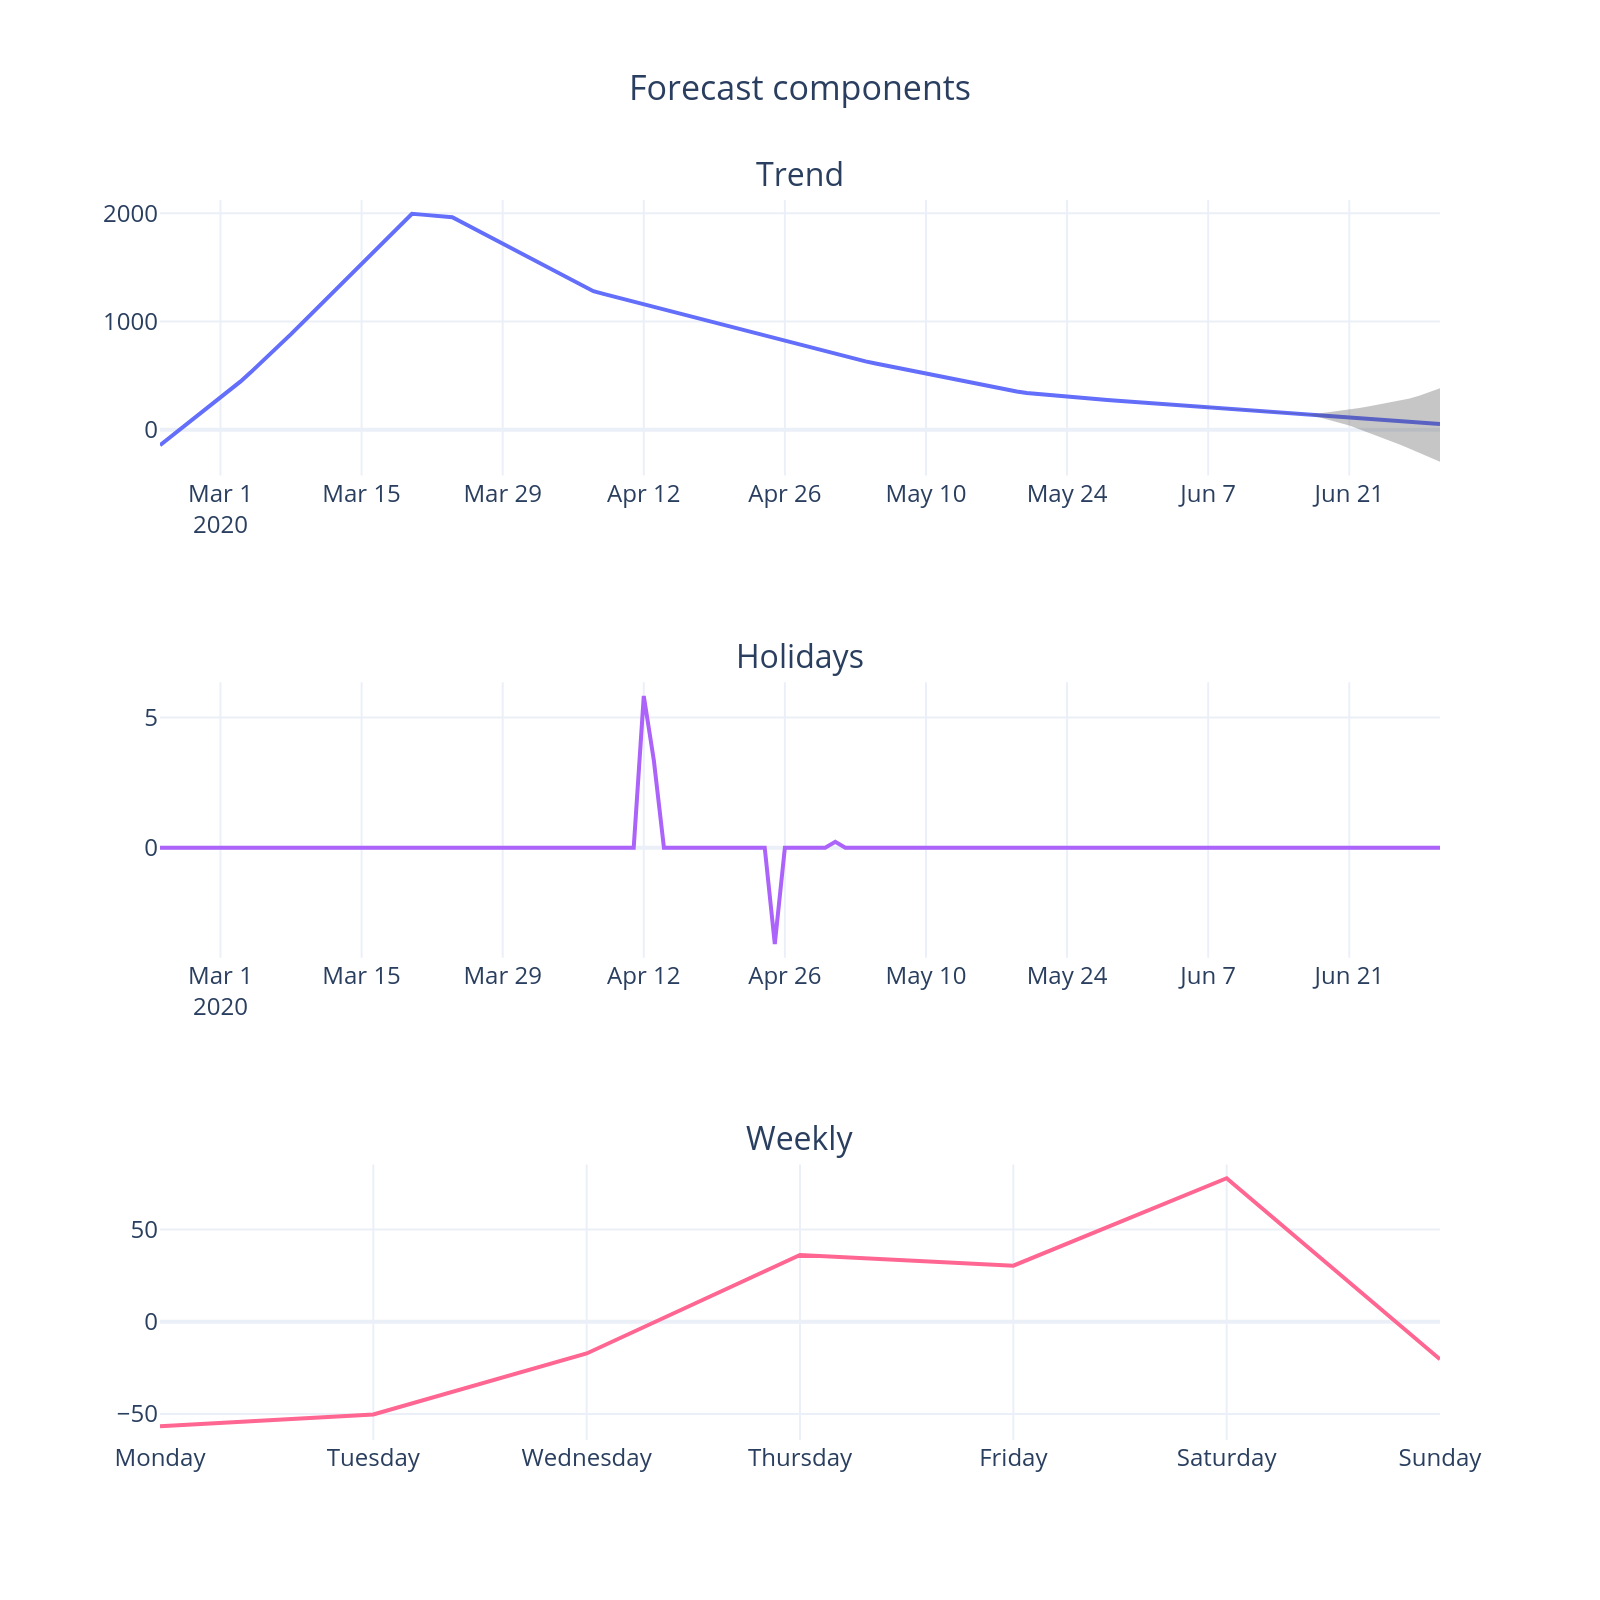

In [22]:
pm.plot_comp_plotly(output_image=True)

In [20]:
pm.print_metrics()

MAE: 155.750
MSE: 51536.673
RMSE: 227.017


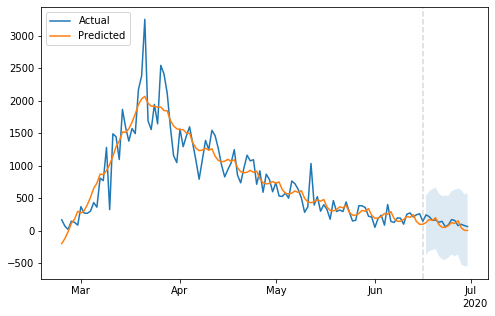

In [21]:
pm.plot()

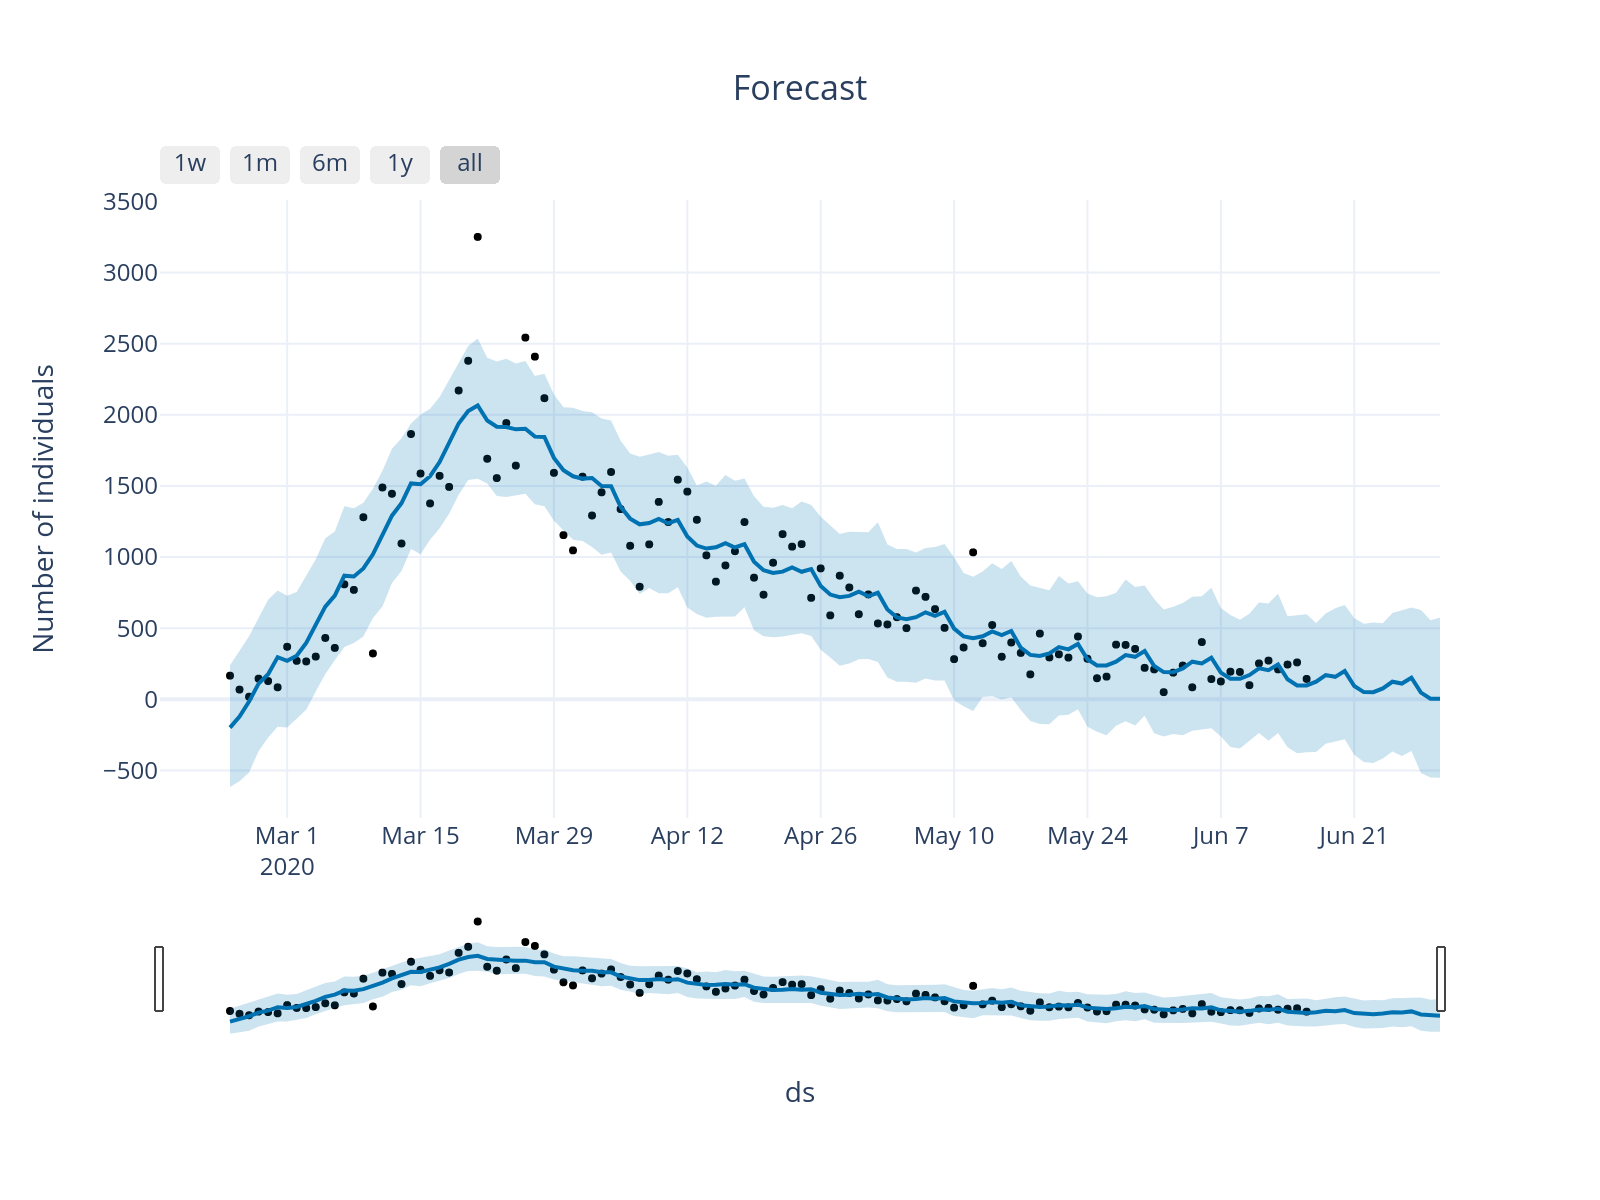

In [23]:
pm.plot_forecast(output_image=True)

### Total positives

In [85]:
province = "Lombardia"
compart = "totale_positivi"
date = 'data'
group_column = 'denominazione_regione'

In [86]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data')

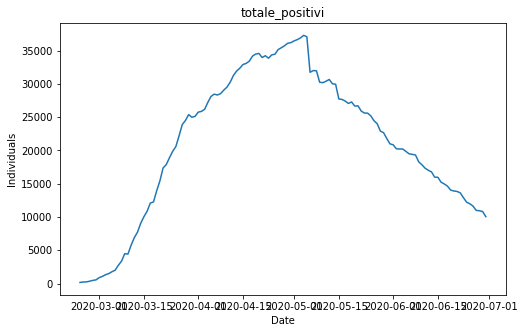

In [87]:
pm.plot_data()

In [88]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8ca8ae80>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f5b8cb9f610>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

In [ ]:
pm.tuning_results

pm.tuning_results.loc[
    (pm.tuning_results.changepoint_prior_scale == pm.best_params['changepoint_prior_scale']) &
    (pm.tuning_results.seasonality_prior_scale == pm.best_params['seasonality_prior_scale']) &
    (pm.tuning_results.holidays_prior_scale == pm.best_params['holidays_prior_scale'])
]

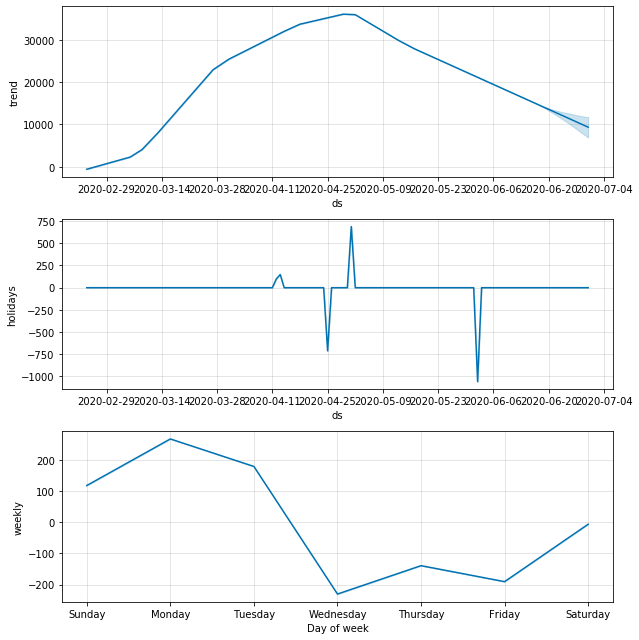

In [89]:
pm.plot_comp()

In [ ]:
pm.plot_comp_plotly(output_image=True)

In [90]:
pm.print_metrics()

MAE: 445.890
MSE: 380196.095
RMSE: 616.600


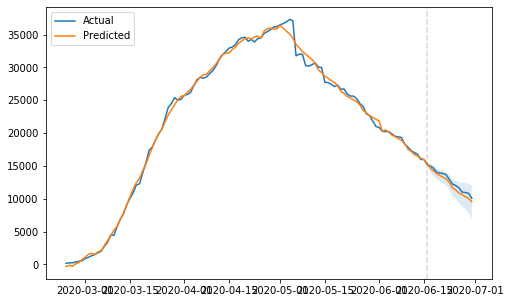

In [91]:
pm.plot()

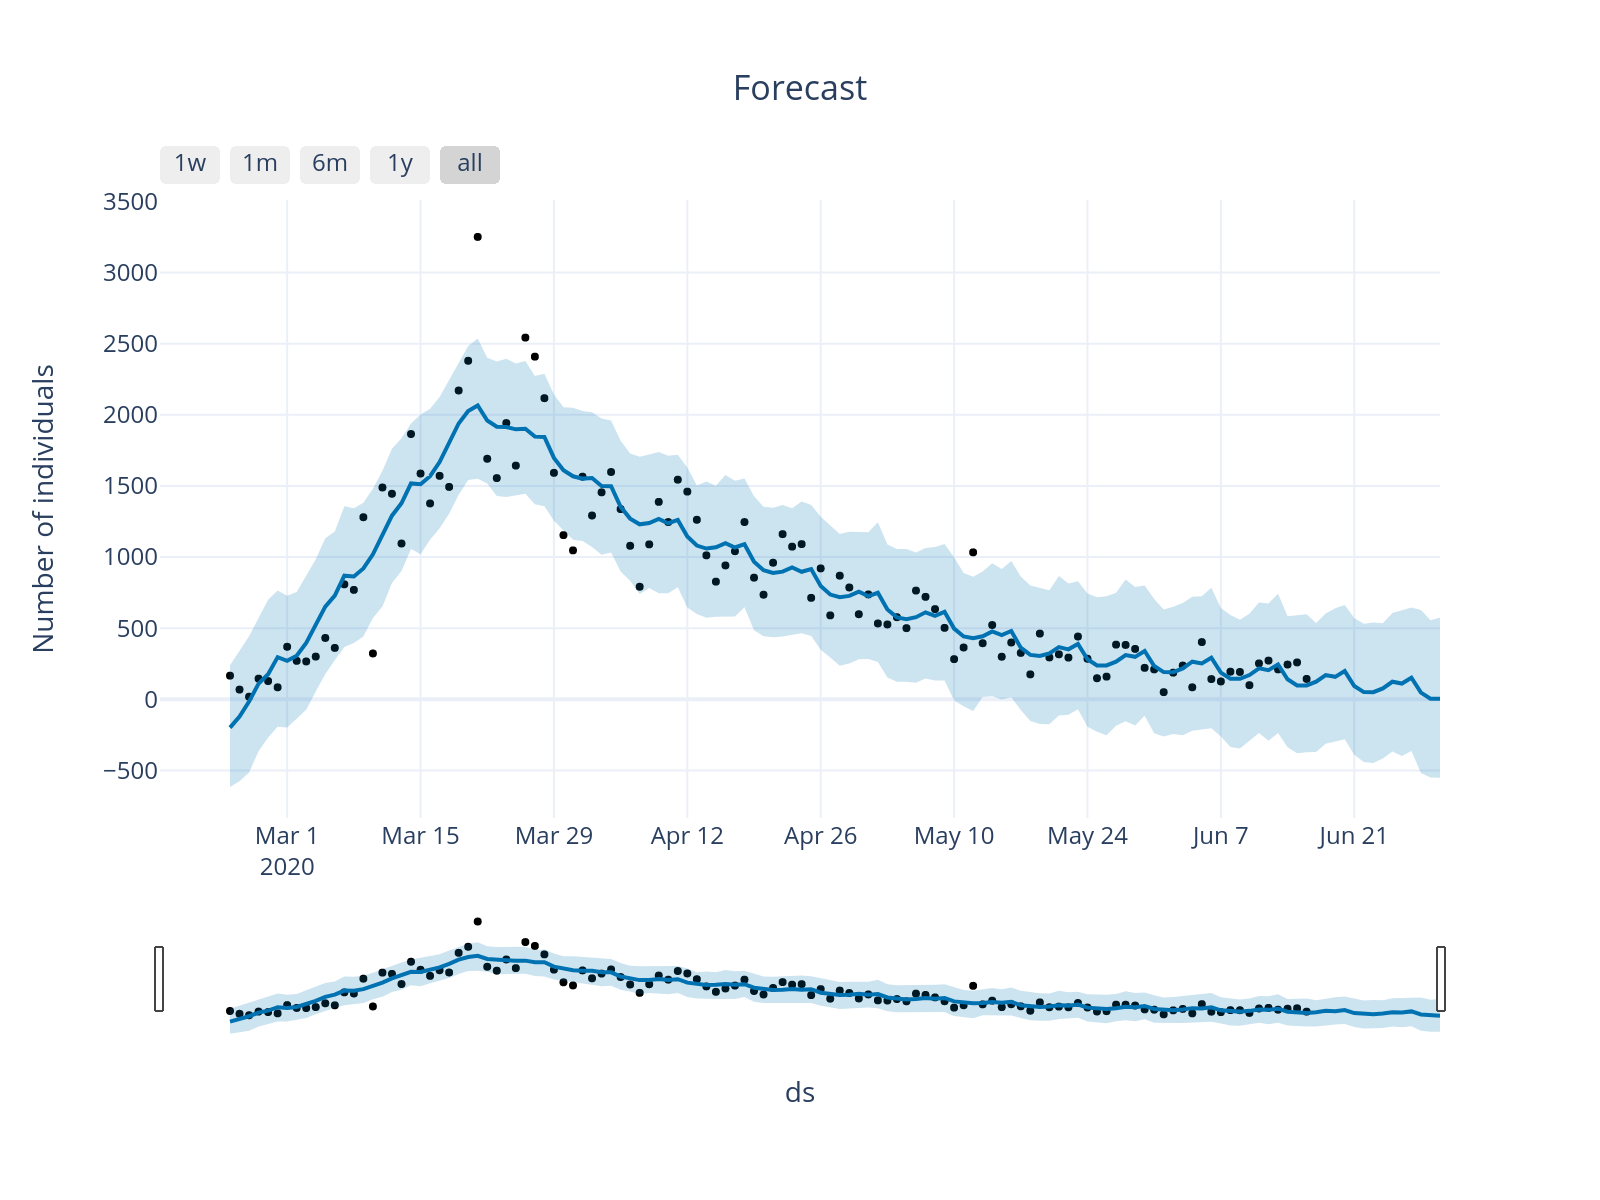

In [25]:
pm.plot_forecast(output_image=True)

### Total cases
Logistic growth

In [ ]:
province = "Lombardia"
compart = "totale_casi"
date = 'data'
group_column = 'denominazione_regione'

In [8]:
pm = ProphetModel(data=dpc_regioni_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date,
                  query='20200701 > data',
                  growth='logistic',
                  holidays=True)

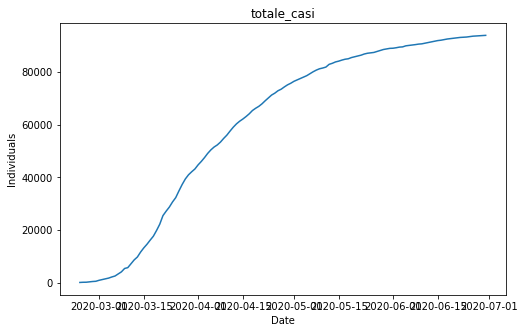

In [9]:
pm.plot_data()

In [10]:
pm.fit_cv()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb639d5aca0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fb63924d940>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

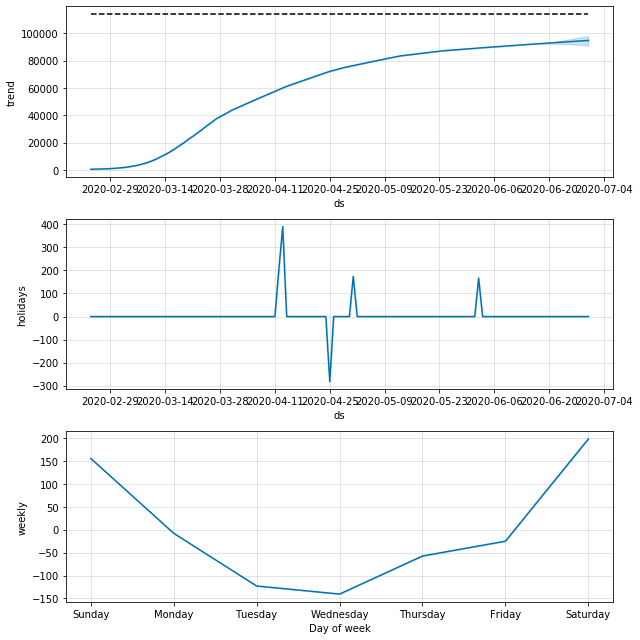

In [11]:
pm.plot_comp()

In [12]:
pm.print_metrics()

MAE: 183.144
MSE: 59699.977
RMSE: 244.336


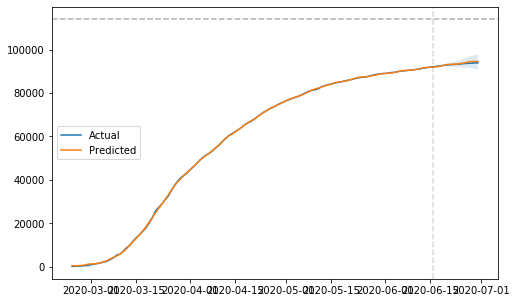

In [13]:
pm.plot()

## Provincial rolling

### Rolling 7 days

In [18]:
compart = 'Cases_Rolling_7'

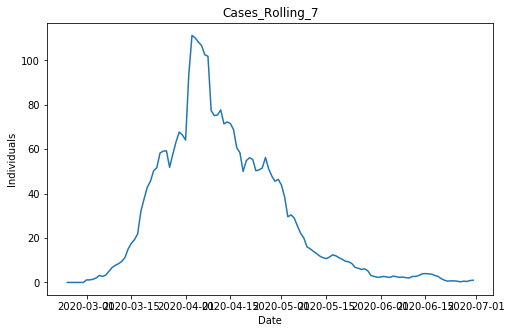

In [19]:
pm = ProphetModel(data=covidpro_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

In [20]:
pm.plot_data()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f87758c3370>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8741020ee0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet 

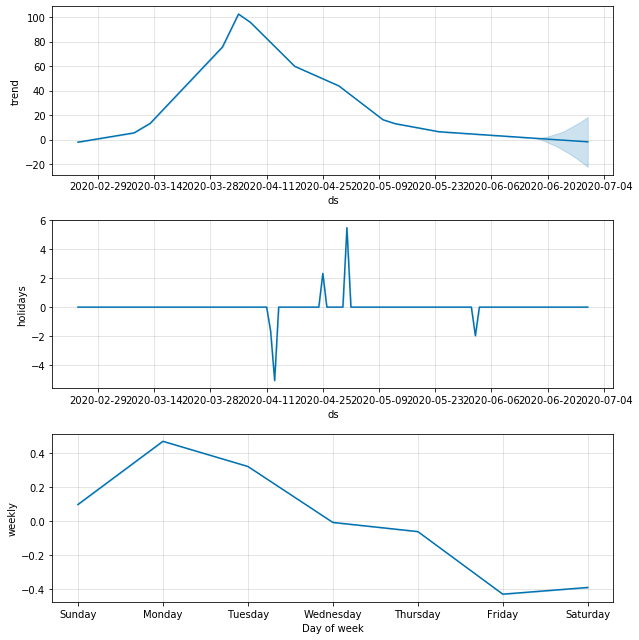

In [21]:
pm.fit_cv()

In [22]:
pm.plot_comp()

MAE: 2.654
MSE: 16.766
RMSE: 4.095


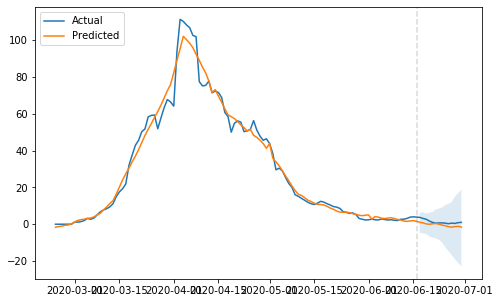

In [23]:
pm.print_metrics()

In [ ]:
pm.plot()

Make the series stationary beforehand

In [10]:
province = "Firenze"
compart = "New_cases"
date = 'Date'
group_column = 'Province'
query = '20200701 > Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query(query)
tmp_df[compart] = tmp_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
tmp_df = tmp_df.set_index(date)
res = np.log(tmp_df[compart]) - np.log(tmp_df[compart]).shift(1)
res_fix = res.replace([np.inf, -np.inf], np.nan).interpolate(method='time')
res_fix = res_fix.fillna(0)

In [11]:
tmp_df = pd.DataFrame(res_fix).reset_index()
tmp_df['Province'] = province

Date  New_cases Province
0   2020-02-24   0.000000  Firenze
1   2020-02-25   0.000000  Firenze
2   2020-02-26   0.000000  Firenze
3   2020-02-27   0.072975  Firenze
4   2020-02-28   0.145950  Firenze
..         ...        ...      ...
123 2020-06-26  -0.005970  Firenze
124 2020-06-27  -0.105844  Firenze
125 2020-06-28  -0.205717  Firenze
126 2020-06-29  -0.305591  Firenze
127 2020-06-30  -0.405465  Firenze

[128 rows x 3 columns]

In [14]:
tmp_df

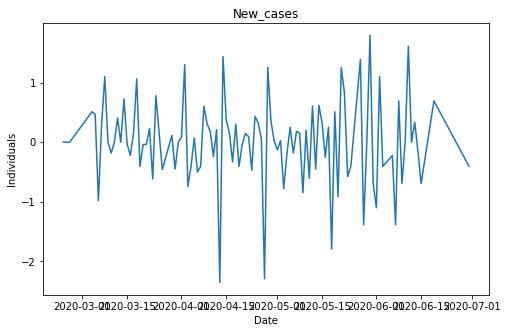

In [15]:
pm = ProphetModel(data=tmp_df, 
                  area=province, 
                  compart=compart, 
                  group_column=group_column,
                  date_column=date)

In [16]:
pm.plot_data()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f99171f4340>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-05-19 00:00:00 and 2020-06-16 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9917248670>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling yearly seasonality. Run prophet wit

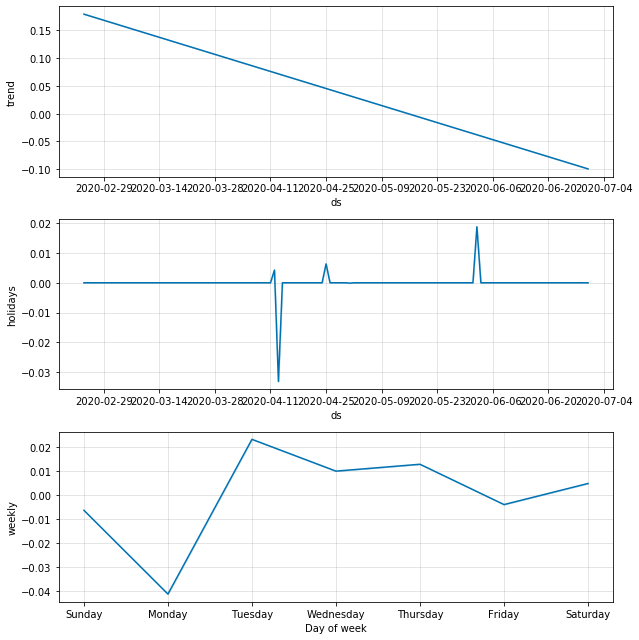

In [17]:
pm.fit_cv()

In [18]:
pm.plot_comp()

MAE: 0.459
MSE: 0.421
RMSE: 0.649


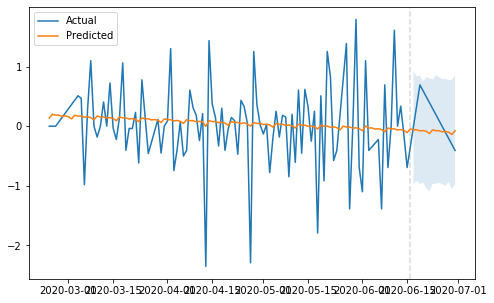

In [19]:
pm.print_metrics()

In [ ]:
pm.plot()